# Model

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
from scipy import stats
from sklearn.cluster import KMeans

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
df = pd.read_json("./train.json")
# test_df = pd.read_json("./test.json")
print("Train Rows : ", df.shape[0])
# print("Test Rows : ", test_df.shape[0])

Train Rows :  49352


## Remove outliers

In [3]:
# df = train_df.drop(train_df[np.abs(stats.zscore(train_df.latitude)) > .1].index)
# df = df.drop(df[np.abs(stats.zscore(df.longitude)) > .1].index)
# coords = train_df[['longitude','latitude']]
# norm_coords = coords[(np.abs(stats.zscore(coords)) < .25 ).all(axis=1)]

In [4]:
# q = train_df["latitude"].quantile(0.99)
# df = train_df[train_df["latitude"] < q]

# q = df["longitude"].quantile(0.99)
# df = df[df["longitude"] < q]
# df = train_df[(np.abs(stats.zscore(train_df)) < .25 ).all(axis=1)]
# df = train_df(np.abs(stats.zscore(train_df['latitude'] >0.25)))

# df['zlatitude']= np.abs(stats.zscore(df['latitude']))
# df['zlongitude']= np.abs(stats.zscore(df['longitude']))
coords = df[['longitude','latitude']]
norm_coords = coords[(np.abs(stats.zscore(coords)) < .25 ).all(axis=1)]

min_long = np.min(norm_coords['longitude'])
max_long = np.max(norm_coords['longitude'])
min_lat = np.min(norm_coords['latitude'])
max_lat = np.max(norm_coords['latitude'])
print(min_long,max_long,min_lat,max_lat)

df = df[df.longitude > min_long]
df = df[df.longitude < max_long]


df = df[df.latitude > min_lat]
df = df[df.latitude < max_lat]





# df = train_df.drop(train_df[df.latitude < 50].index
df.shape

-74.2224 -73.7001 40.5836 40.8989


(49206, 15)

In [5]:
df[['longitude','latitude']].describe()

,longitude,latitude
count,49206.000000,49206.000000
mean,-73.972558,40.751136
std,0.029286,0.038782
min,-74.216000,40.583700
25%,-73.991700,40.728300
50%,-73.977900,40.751800
75%,-73.954800,40.774300
max,-73.714200,40.896300


In [6]:
def featureList(keyword,vector):
    newVec = pd.Series(0, index=np.arange(len(vector)))
    for ind, row in vector.iteritems():
        newVec[ind]=False
        if len(vector)==0:
            pass
        else:    
            for item in row:
                if keyword in item.lower():
                    newVec[ind]=True
                    break
    print(sum(newVec))
    return newVec

## Encoded features

In [39]:
df['cats'] = featureList('cats',df['features'])

df['dogs'] = featureList('dogs',df['features'])

23453
21953


In [40]:
df['hardwood'] = featureList('wood',df['features'])

df['prewar'] = featureList('pre war',df['features'])|(featureList('pre-war',df['features']))

df['terrace'] = featureList('terrace',df['features'])

24611
3
9132
2378


In [41]:
df['patio'] = featureList('patio',df['features'])

df['parking'] = featureList('parking',df['features'])|(featureList('garage',df['features']))

df['roof'] = featureList('roof',df['features'])

2082
669
1033
7130


In [ ]:
df['pool'] = featureList('pool',df['features'])

df['gym'] = featureList('gym',df['features'])

df['kitchen'] = featureList('kitchen',df['features'])

df['parking'] = featureList('parking',df['features'])|(featureList('garage',df['features']))

df['doorman'] = featureList('doorman',df['features'])

3097
194
351
669
1033
21021


In [ ]:
df['dishwasher'] = featureList('dishwasher',df['features'])|(featureList('dish',df['features']))

df['laundry'] = featureList('laundry',df['features'])|(featureList('dryer',df['features']))

df['doorman'] = featureList('doorman',df['features'])

df['terrace'] = featureList('terrace',df['features'])

20795
20798
23843


In [ ]:
df['bike'] = featureList('bike',df['features'])|(featureList('bicycle',df['features']))

df['storage'] = featureList('storage',df['features'])

df['outdoor'] = featureList('outdoor',df['features'])

df['light'] = featureList('light',df['features'])

df['closet'] = featureList('closet',df['features'])

In [ ]:
df.shape

## Manager Popularity


In [7]:
manager_popularity = df.manager_id.value_counts()
df['num_owner_locations'] = [manager_popularity[x]
                       if x in manager_popularity
                       else 1
                       for x in df['manager_id']]


In [8]:
df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address,num_owner_locations
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,90
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue,86
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street,134
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street,191
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street,15


## Building Popularity


In [9]:
building_popularity = df.building_id.value_counts()
df['num_listings_building'] = [building_popularity[x]
                       if x in x!='0' and x in building_popularity
                       else 0
                       for x in df['building_id']]

## Number of photos

In [10]:
df['num_photos'] = df.apply(lambda x: len(x['photos']), axis=1)

## Number of features

In [11]:
df['num_features'] = df.apply(lambda x: len(x['features']), axis=1)

## Description length

In [12]:
df['description_len'] = df.apply(lambda x: len(x['description']), axis=1)

## Age of listing

In [13]:
df["created"] = pd.to_datetime(df["created"])
df["date_created"] = df["created"].dt.date

earliest = max(df['date_created'])
df['age'] = df.apply(lambda x: (earliest-x['date_created']), axis=1).dt.days

## District clustering

In [14]:
kmeans = KMeans(n_clusters=20,random_state=1)
kmeans.fit(df[['longitude','latitude']])
predictions = kmeans.predict(df[['longitude','latitude']])

In [15]:
kmeans.predict([[40,-70]])[0]

19

In [16]:
from sklearn.externals import joblib
joblib.dump(kmeans, 'kmeans.pkl') 

['kmeans.pkl']

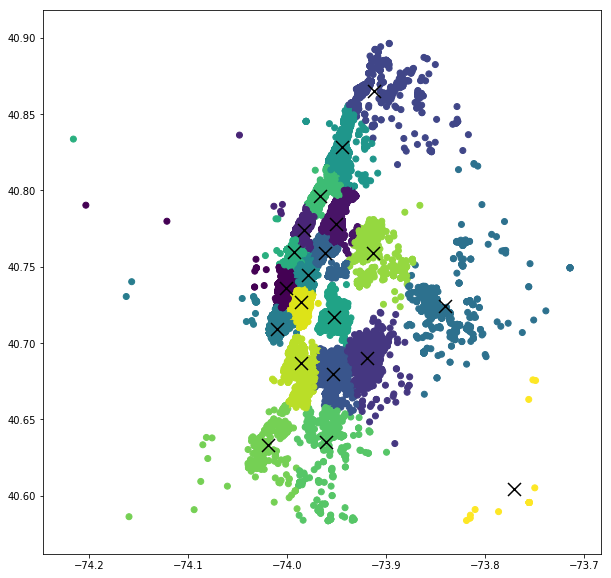

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(df['longitude'], df['latitude'], c=predictions)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=30,
            color='black')

In [18]:
df.shape

(49206, 22)

In [19]:
df['district'] = kmeans.predict(df[['longitude','latitude']])
df['district'] = df['district'].astype(str)

df = pd.concat([df,pd.get_dummies(df.district,prefix="cluster_")],axis=1)

## In Manhattan

In [20]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

nw = (40.883982, -73.932266)
sw =  (40.706982, -74.032860)
se = (40.695009, -73.981361)
ne = (40.800089, -73.913040)
tip = (40.699434, -74.025650)
tip2 = (40.699174, -74.006081)
tip3 = (40.708804, -73.977585)
tip4 = (40.732482, -73.965569)
tip5 = (40.748090, -73.959732)
tip6 = (40.777215, -73.937416)
tip7 = (40.801648, -73.925057)
tip8= (40.873598, -73.904800)

manhattan = Polygon([nw, sw, tip, tip2, tip3, tip4, tip5, tip6, tip7, tip8])

In [21]:
pair = list(zip(df.latitude, df.longitude))
df["in_manhattan"] = np.array([1 if manhattan.contains(Point(x)) else 0
                                        for x in pair])

## Price per bathroom

In [22]:
def bathroom_price(row):
    try: 
        x = row['price']/row['bathrooms']
        return x
    except:
        return row['price']
df['price_per_bathroom'] = df.apply(lambda row: bathroom_price(row),axis=1)

## Price per bedroom

In [23]:
def bedroom_price(row):
    try: 
        x = row['price']/row['bedrooms']
        return x
    except:
        return row['price']
        
df['price_per_bedroom'] = df.apply(lambda row: bedroom_price (row),axis=1)

## Pickle


In [36]:
df.to_pickle("rentals.pkl")

## Model